In [100]:
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install reproject

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import matplotlib.patches as patches
import pandas as pd
from astropy.visualization import simple_norm
from astropy import wcs
from astropy.wcs import WCS
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector
from matplotlib.transforms import Bbox
from astropy.io import ascii
from astropy import units as u
from astropy import coordinates
from astropy.coordinates import SkyCoord
from radio_beam import Beam
from astropy.io import fits
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve
from astropy.convolution import convolve_fft
from reproject import reproject_interp
import cv2

In [102]:
# high resolution files
highres_file ='/orange/adamginsburg/w51/w51-alma-longbaseline/FITS/W51n_cont_uniform.image.tt0.pbcor.fits'
hdu_highres = fits.open(highres_file)
hdu_highres.info()
highres = hdu_highres[0].data
highres = np.squeeze(highres)
header_high = hdu_highres['PRIMARY'].header
hdu_highres.close()
wcs_high = wcs.WCS(header_high)
beam_high = Beam.from_fits_header(header_high)
print(beam_high)
highres = highres/beam_high.sr

Filename: /orange/adamginsburg/w51/w51-alma-longbaseline/FITS/W51n_cont_uniform.image.tt0.pbcor.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (5120, 5120)   float32   
Beam: BMAJ=0.0257846564054484 arcsec BMIN=0.017433758825064 arcsec BPA=-43.38716125488 deg


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [103]:
# header_high

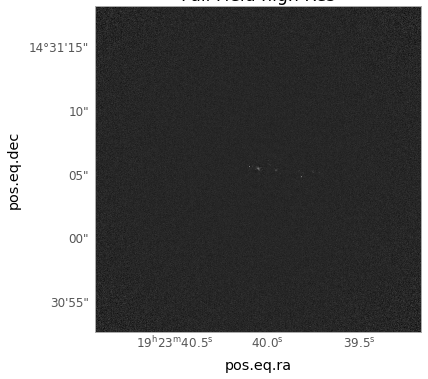

In [104]:
# Plot of high resolution image
# norm_full_low=simple_norm(lowres.value, stretch='asinh', min_percent=0.01, max_percent=99.99)
ax = plt.subplot(projection=wcs_high.celestial)
plt.imshow(highres.value, cmap='gray', interpolation="nearest", origin="lower")
ax.grid(False)
ax.set_title('Full Field high Res')
plt.show()

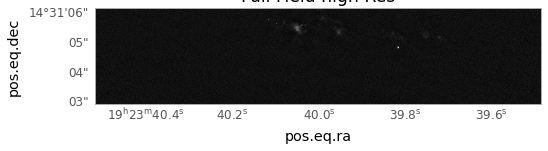

In [105]:
# Plot of high resolution image
# norm_full_low=simple_norm(lowres.value, stretch='asinh', min_percent=0.01, max_percent=99.99)
ax = plt.subplot(projection=wcs_high.celestial[2050:2700,1200:4200])
plt.imshow(highres.value[2050:2700,1200:4200], cmap='gray', interpolation="nearest", origin="lower")
ax.grid(False)
ax.set_title('Full Field high Res')
# plt.scatter(ra, dec, transform=ax.get_transform('icrs'), marker='x', s=20)
plt.show()

In [106]:
# Low resolution files
lowres_file = "/orange/adamginsburg/w51/ALMA-IMF_W51/W51-IRS2/B6/bsens/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_bsens_12M_robust0_selfcal8_finaliter.image.tt0.pbcor.fits"
hdu_lowres = fits.open(lowres_file)
hdu_lowres.info()
lowres = hdu_lowres[0].data
lowres = np.squeeze(lowres)
header_low = hdu_lowres['PRIMARY'].header
hdu_lowres.close()
wcs_low = wcs.WCS(header_low)
beam_low = Beam.from_fits_header(header_low)
print(beam_low)
lowres = lowres/beam_low.sr

Filename: /orange/adamginsburg/w51/ALMA-IMF_W51/W51-IRS2/B6/bsens/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_bsens_12M_robust0_selfcal8_finaliter.image.tt0.pbcor.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      88   (1120, 1120, 1, 1)   float32   
Beam: BMAJ=0.50521850585928 arcsec BMIN=0.43920379877076 arcsec BPA=-25.74533081055 deg


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [107]:
# header_low

In [108]:
beam_high.sr

<Quantity 1.19719953e-14 sr>

In [109]:
array_semifull, footprint = reproject_interp((lowres, wcs_low.celestial), wcs_high.celestial[2050:2700,1200:4200], shape_out=highres[2050:2700,1200:4200].shape)

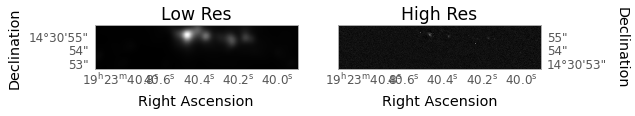

In [110]:
ax1 = plt.subplot(1,2,1, projection=wcs_high.celestial)
ax1.imshow(array_semifull, cmap='gray', interpolation="nearest", origin="lower")
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('Low Res')
ax1.grid(False)

ax2 = plt.subplot(1,2,2, projection=wcs_high.celestial)
ax2.imshow(highres[2050:2700,1200:4200].value, cmap='gray', interpolation="nearest", origin="lower")
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title('High Res')
ax2.grid(False)
plt.show()

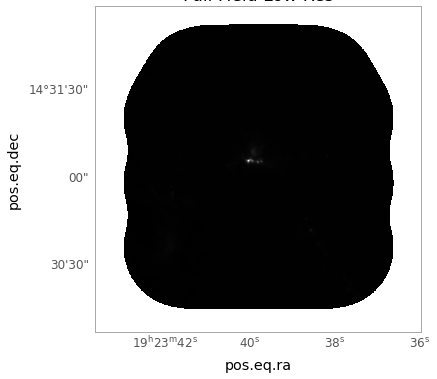

In [111]:
# Plot of low resolution image
norm_full_low=simple_norm(lowres.value, stretch='asinh', min_percent=0.01, max_percent=99.99)
ax = plt.subplot(projection=wcs_low.celestial)
plt.imshow(lowres.value, cmap='gray', interpolation="nearest", origin="lower")
ax.grid(False)
ax.set_title('Full Field Low Res')
plt.show()

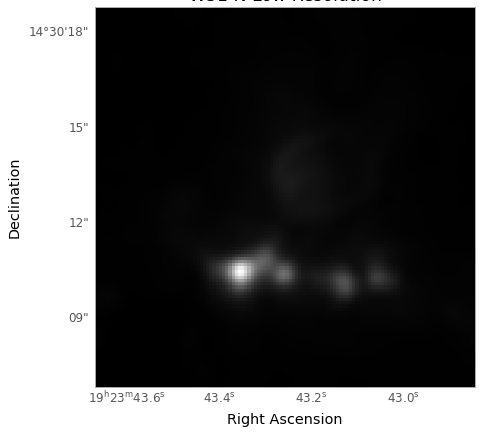

In [112]:
plt.figure(figsize=(7, 7))
ax = plt.subplot(projection=wcs_low[550:670, 480:600].celestial)
plt.imshow(lowres[550:670, 480:600].value, cmap='gray', interpolation="nearest", origin="lower")
ax.grid(False)
ax.set_title('W51 N Low Resolution')
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')
plt.show()

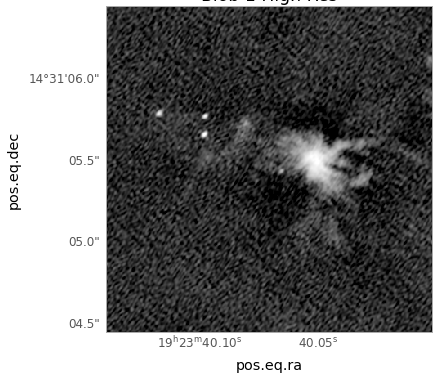

In [113]:
highres_blob1 = highres[2350:2750, 2300:2700]
norm_highres_blob1 = simple_norm(highres_blob1, stretch='asinh', min_percent=5, max_percent=99.99)
ax = plt.subplot(projection=wcs_high.celestial[2350:2750, 2300:2700])
ax.imshow(highres_blob1, cmap='gray', interpolation="nearest", origin="lower", norm=norm_highres_blob1)
ax.grid(False)
ax.set_title('Blob 1 High Res')
plt.show()

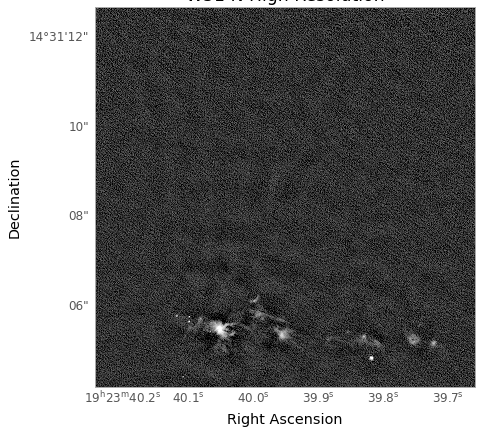

In [114]:
plt.figure(figsize=(7, 7))
zoom_high = highres[2300:4000, 2000:3700]
norm_zoom_high = simple_norm(zoom_high, stretch='asinh', min_percent=5, max_percent=99.99)
ax = plt.subplot(projection=wcs_high.celestial[2300:4000, 2000:3700])
ax.imshow(zoom_high, cmap='gray', interpolation="nearest", origin="lower", norm=norm_zoom_high)
ax.grid(False)
ax.set_title('W51 N High Resolution')
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')
plt.show()

In [115]:
# convolving to blur the high resolution
deconv_beam = beam_low.deconvolve(beam_high)
pix_scale = wcs.utils.proj_plane_pixel_scales(wcs_high)[0]*u.deg
gauss_kern = deconv_beam.as_kernel(pix_scale)
print(deconv_beam, pix_scale.to(u.arcsec))
gauss_kern.model
pix_scale_low = wcs.utils.proj_plane_pixel_scales(wcs_low)[0]*u.deg
print(pix_scale, pix_scale_low)

Beam: BMAJ=0.5045931179200723 arcsec BMIN=0.43881968553591627 arcsec BPA=-25.649083399903933 deg 0.0050000000000004 arcsec
1.388888888889e-06 deg 2.777777777778e-05 deg


In [116]:
print(pix_scale*3600*u.arcsec/u.deg, pix_scale_low*3600*u.arcsec/u.deg)

0.0050000000000004 arcsec 0.100000000000008 arcsec


In [117]:
wcs_high.wcs.cunit
len(wcs_low.wcs.cdelt)

4

In [118]:
# bluring the high resolution of blob 1
blob1_conv = convolve(highres_blob1, gauss_kern)

In [119]:
zoom_conv = convolve_fft(zoom_high, gauss_kern)

In [120]:
semifull_conv = convolve_fft(highres[2050:2700,1200:4200], gauss_kern)

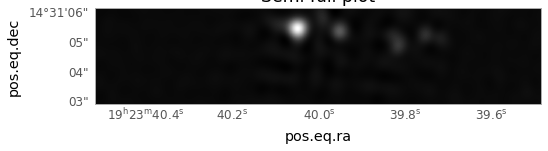

In [121]:
ax = plt.subplot(projection=wcs_high.celestial[2050:2700,1200:4200])
ax.imshow(semifull_conv, cmap='gray', interpolation="nearest", origin="lower")
ax.grid(False)
ax.set_title('Semi full plot')
# plt.scatter(260,210)
plt.show()

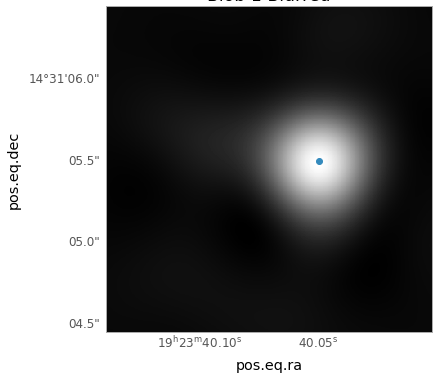

In [122]:
# print(blob1_conv[250:270,200:220])
# norm_zoom_low = simple_norm(array_zoom, stretch='asinh', min_percent=0.001, max_percent=99.9999)
ax = plt.subplot(projection=wcs_high.celestial[2350:2750, 2300:2700])
ax.imshow(blob1_conv,  cmap='gray', interpolation="nearest", origin="lower")
ax.grid(False)
ax.set_title('Blob 1 Blurred')
plt.scatter(260,210)
plt.show()

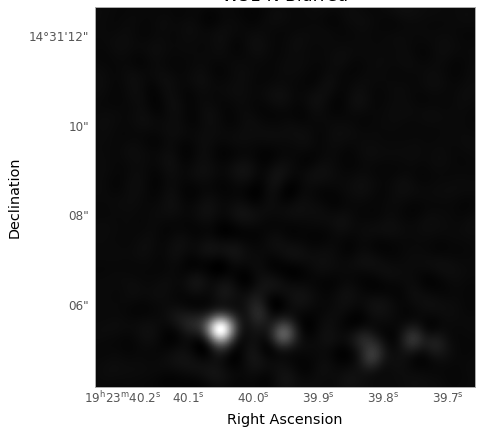

In [123]:
plt.figure(figsize=(7, 7))
ax = plt.subplot(projection=wcs_high.celestial[2300:4000, 2000:3700])
ax.grid(False)
plt.imshow(zoom_conv, cmap='gray', interpolation="nearest", origin="lower")
ax.set_title('W51 N Blurred')
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')
plt.show()

In [124]:
# NBINS = 1000
# histogram = plt.hist(zoom_conv.flat, NBINS)
# histogram = plt.hist((zoom_high.value).flat, NBINS)

In [125]:
array_zoom, footprint1 = reproject_interp((lowres, wcs_low.celestial), wcs_high.celestial[2300:4000, 2000:3700], shape_out=zoom_conv.shape)

In [126]:
array_blob1, footprint2 = reproject_interp((lowres, wcs_low.celestial), wcs_high.celestial[2350:2750, 2300:2700], shape_out=blob1_conv.shape)

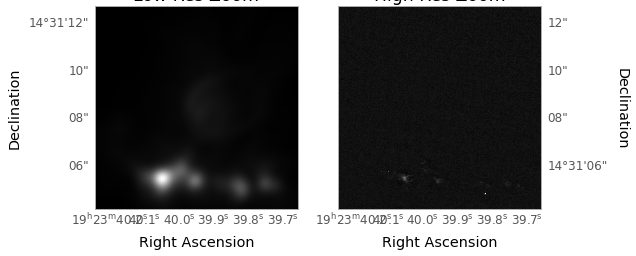

-154523467776.0 1 / sr
nan 1 / sr


In [127]:
ax1 = plt.subplot(1,2,1, projection=wcs_high.celestial[2300:4000, 2000:3700])
ax1.imshow(array_zoom, cmap='gray', interpolation="nearest", origin="lower")
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('Low Res Zoom')
ax1.grid(False)

ax2 = plt.subplot(1,2,2, projection=wcs_high.celestial[2300:4000, 2000:3700])
ax2.imshow(zoom_high.value, cmap='gray', interpolation="nearest", origin="lower")
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title('High Res Zoom')
ax2.grid(False)
plt.show()
print(min(highres[5]))
print(min(lowres[5]))

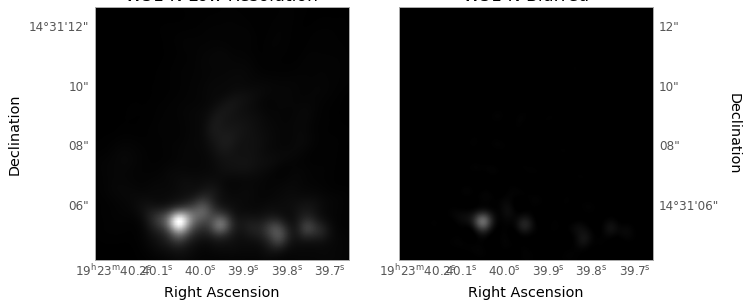

In [128]:
plt.figure(figsize=(10, 10))
norm = simple_norm(array_zoom, min_percent=1, max_percent=99.999)
ax1 = plt.subplot(1,2,1, projection=wcs_high.celestial[2300:4000, 2000:3700])
zoom1=ax1.imshow(array_zoom, cmap='gray', interpolation="nearest", origin="lower", norm=norm)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('W51 N Low Resolution')
ax1.grid(False)
# plt.colorbar(mappable=zoom1)

ax2 = plt.subplot(1,2,2, projection=wcs_high.celestial[2300:4000, 2000:3700])
zoom2=ax2.imshow(zoom_conv, cmap='gray', interpolation="nearest", origin="lower", norm=norm)
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title('W51 N Blurred')
ax2.grid(False)
# plt.colorbar(mappable=zoom2)
plt.show()

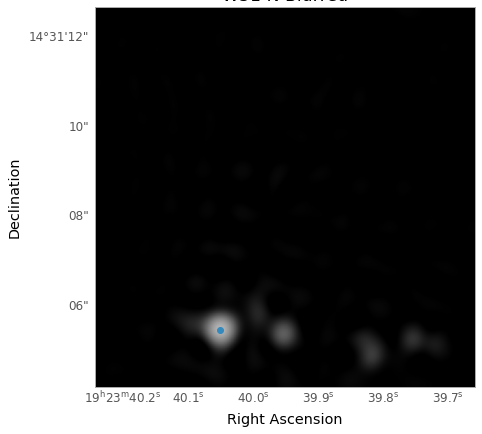

In [129]:
# print(zoom_conv[550:570, 246:266])
plt.figure(figsize=(7, 7))
norm_zoom_low = simple_norm(array_zoom, stretch='asinh', min_percent=0.001, max_percent=99.9999)
ax = plt.subplot(projection=wcs_high.celestial[2300:4000, 2000:3700])
norm_zoom_low = simple_norm(array_zoom, stretch='asinh', min_percent=0.001, max_percent=99.9999)
ax.grid(False)
plt.imshow(zoom_conv, cmap='gray', interpolation="nearest", origin="lower", norm=norm_zoom_low)
ax.set_title('W51 N Blurred')
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')
plt.scatter(560, 256)
plt.show()

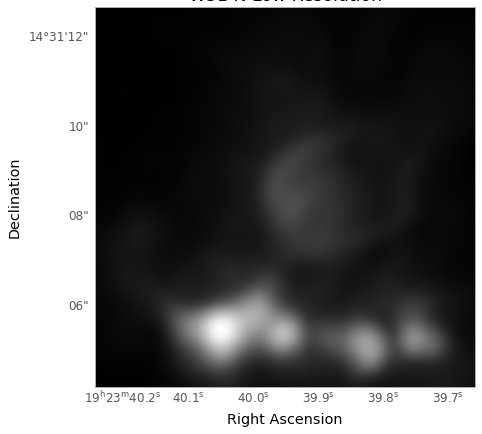

In [130]:
plt.figure(figsize=(7, 7))
ax = plt.subplot(projection=wcs_high.celestial[2300:4000, 2000:3700])
norm_zoom_low = simple_norm(array_zoom, stretch='asinh', min_percent=0.001, max_percent=99.9999)
ax.grid(False)
plt.imshow(array_zoom, cmap='gray', interpolation="nearest", origin="lower", norm=norm_zoom_low)
ax.set_title('W51 N Low Resolution')
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')
# plt.colorbar()
plt.show()

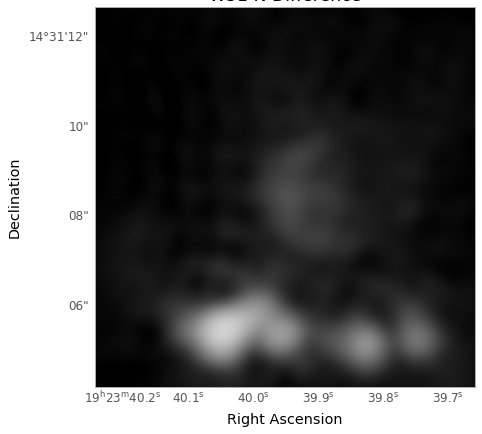

In [131]:
zoom_diff = array_zoom - zoom_conv
plt.figure(figsize=(7, 7))
ax = plt.subplot(projection=wcs_high.celestial[2300:4000, 2000:3700])
ax.grid(False)
plt.imshow(zoom_diff, cmap='gray', interpolation="nearest", origin="lower", norm=norm_zoom_low)
# plt.colorbar()
ax.set_title('W51 N Difference')
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')
# plt.colorbar()
plt.show()

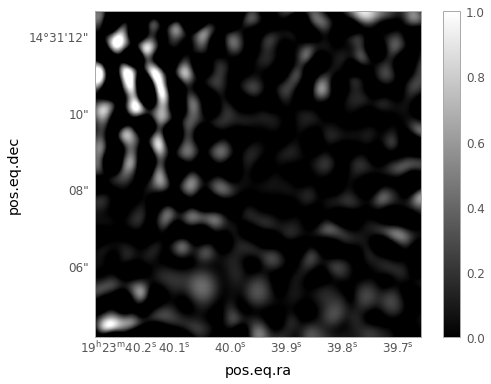

In [132]:
ratio_map = (zoom_conv)/ array_zoom
# bad = lowres_data < threshold
norm_ratio_map = simple_norm(ratio_map, stretch='asinh', min_percent=0.01, max_percent=99.999)
ax = plt.subplot(projection=wcs_high.celestial[2300:4000, 2000:3700])
ax.grid(False)
plt.imshow(ratio_map, vmin=0, vmax=1, cmap='gray', interpolation="nearest", origin="lower")
plt.colorbar()
plt.show()

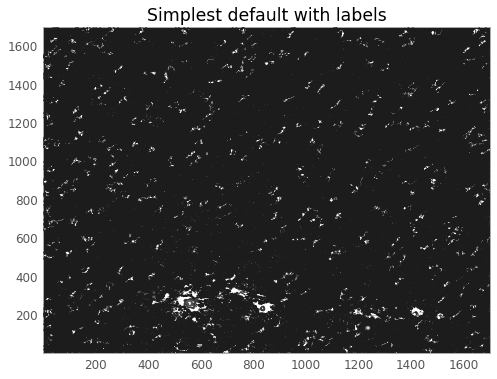

In [133]:
fig, ax = plt.subplots()
CS = ax.contour(zoom_high, cmap='gray', origin="lower")
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')
plt.show()

(300.0, 750.0, 200.0, 400.0)

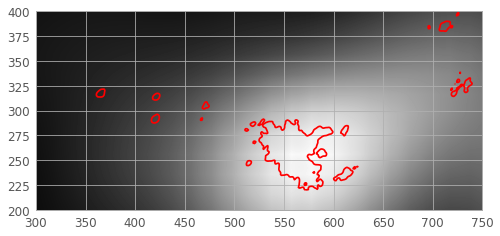

In [134]:
plt.imshow(zoom_diff, cmap='gray', interpolation="nearest", origin="lower")
plt.contour(zoom_high, origin="lower", levels=[1e11],colors=['r'])
plt.axis((300,750,200,400))

In [135]:
zoom_diff[257:263, 572:578]

array([[9.26423741e+10, 9.29326531e+10, 9.32537882e+10, 9.36050489e+10,
        9.39856615e+10, 9.43948109e+10],
       [9.21558108e+10, 9.24496964e+10, 9.27743718e+10, 9.31291090e+10,
        9.35131373e+10, 9.39256444e+10],
       [9.17016506e+10, 9.19988966e+10, 9.23268514e+10, 9.26847902e+10,
        9.30719454e+10, 9.34875080e+10],
       [9.12799038e+10, 9.15802652e+10, 9.19112397e+10, 9.22721063e+10,
        9.26621008e+10, 9.30804181e+10],
       [9.08905308e+10, 9.11937639e+10, 9.15275003e+10, 9.18910225e+10,
        9.22835705e+10, 9.27043433e+10],
       [9.05334418e+10, 9.08393051e+10, 9.11755473e+10, 9.15414553e+10,
        9.19362732e+10, 9.23592048e+10]])

In [136]:
point= coordinates.SkyCoord('19:23:39.00 +14:31:20.0', unit=(u.hour, u.deg), frame='icrs')
[point.ra, point.dec]

[<Longitude 290.9125 deg>, <Latitude 14.52222222 deg>]

In [137]:
x=wcs_high.celestial[2300:4000, 2000:3700].wcs_world2pix(290.916875, 14.51819444, 0)
print(x)

[array(560.), array(259.9968032)]


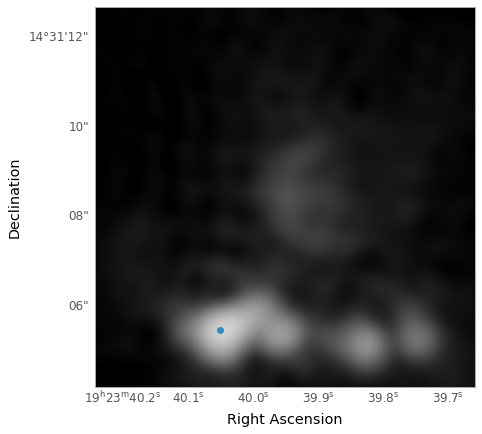

In [138]:
zoom_diff = array_zoom - zoom_conv
plt.figure(figsize=(7, 7))
ax = plt.subplot(projection=wcs_high.celestial[2300:4000, 2000:3700])
ax.grid(False)
plt.imshow(zoom_diff, cmap='gray', interpolation="nearest", origin="lower", norm=norm_zoom_low)
# plt.colorbar()
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')
# plt.colorbar()
plt.scatter(560, 256)
plt.show()

In [139]:
zoom_diff[560, 260]

3773172459.8817325

In [140]:
HandCat = "/orange/adamginsburg/w51/W51_ALMA_2013.1.00308.S/tables/core_continuum_and_line.ipac"
from astropy.io import ascii
data_HandCat = ascii.read(HandCat)  
# data_HandCat

In [141]:
DendroCat = "/orange/adamginsburg/w51/W51_ALMA_2013.1.00308.S/tables/core_continuum_and_line.ipac"
from astropy.io import ascii
data_DendroCat = ascii.read(DendroCat)  
# data_DendroCat

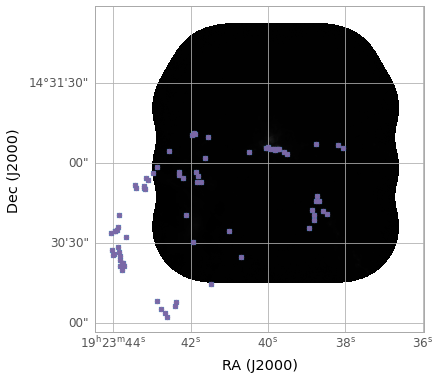

In [142]:
# plt.scatter(data_HandCat['RA'], data_HandCat['Dec'])
# # plt.imshow(lowres)

ax = plt.subplot(projection=wcs_low.celestial)
# left_side = coordinates.SkyCoord('19:23:45.0 +14:31:34.0', unit=(u.hour, u.deg), frame='icrs')

ax.imshow(lowres.value, cmap='gray', interpolation="nearest",
          origin="lower")
# make_scalebar(ax, coordinates.SkyCoord('19:23:43.95 +14:30:34.0', unit=(u.hour, u.deg), frame='icrs'),
#               length=0.2*u.arcsec, label='0.2" = 1000 AU', fontsize=14, text_offset=0.02*u.arcsec)
plt.scatter(data_HandCat['RA'], data_HandCat['Dec'], transform=ax.get_transform('icrs'), marker='x', s=20)
plt.scatter(data_DendroCat['RA'], data_DendroCat['Dec'], transform=ax.get_transform('icrs'), marker='o', s=20)
# plt.scatter(c.ra, c.dec, transform=ax.get_transform('icrs'), s=20)
ax.set_ylabel('Dec (J2000)')
ax.set_xlabel('RA (J2000)')
# ax.set_title('W51 North/IRS2')
plt.show()

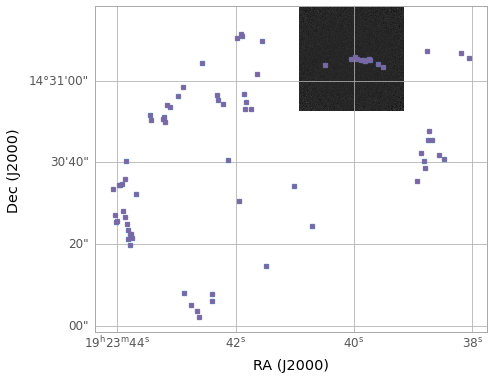

In [143]:
ax = plt.subplot(projection=wcs_high.celestial)
# left_side = coordinates.SkyCoord('19:23:45.0 +14:31:34.0', unit=(u.hour, u.deg), frame='icrs')

ax.imshow(highres.value, cmap='gray', interpolation="nearest",
          origin="lower")
# ax2 = plt.subplot(projection=wcs_high2.celestial)
# ax2.imshow(highres2.value, cmap='gray', interpolation="nearest",
#           origin="lower")
# make_scalebar(ax, coordinates.SkyCoord('19:23:43.95 +14:30:34.0', unit=(u.hour, u.deg), frame='icrs'),
#               length=0.2*u.arcsec, label='0.2" = 1000 AU', fontsize=14, text_offset=0.02*u.arcsec)
plt.scatter(data_HandCat['RA'], data_HandCat['Dec'], transform=ax.get_transform('icrs'), marker='x', s=20)
plt.scatter(data_DendroCat['RA'], data_DendroCat['Dec'], transform=ax.get_transform('icrs'), marker='o', s=20)
# plt.scatter(c.ra, c.dec, transform=ax.get_transform('icrs'), s=20)
ax.set_ylabel('Dec (J2000)')
ax.set_xlabel('RA (J2000)')
# ax.set_title('W51 North/IRS2')
# plt.axis((-1000,750,-1000,400))
plt.show()

In [144]:
r = data_HandCat['RA']
d = data_HandCat['Dec']
ra_list=[]
dec_list=[]
position=[]
for i in range(len(r)):
    if r[i] <= 290.92083333 and r[i] >= 290.9125:
        ra_list.append(r[i])
        position.append(i)
for i in position:
    dec_list.append(d[i])
ra=[]
dec=[]
# print(ra_list, dec_list)
for i in range(len(ra_list)):
    if dec_list[i] >= 14.516:
        dec.append(dec_list[i])
        ra.append(ra_list[i])
print(ra, dec)

[290.918733333, 290.916470833, 290.915641667, 290.915516667, 290.91595, 290.916158333, 290.916629167, 290.914658333, 290.914958333, 290.915908333, 290.91685] [14.5177611111, 14.5181527778, 14.5181222222, 14.5180972222, 14.5181194444, 14.5181083333, 14.5182694444, 14.5175916667, 14.5178138889, 14.5180083333, 14.5181722222]


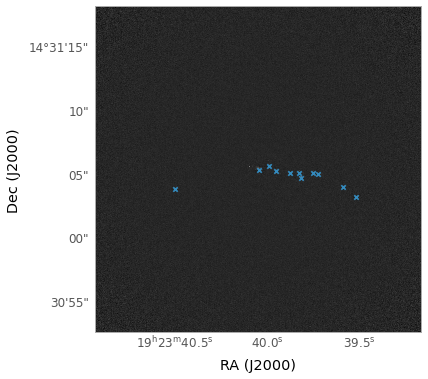

In [145]:
ax = plt.subplot(projection=wcs_high.celestial)

ax.imshow(highres.value, cmap='gray', interpolation="nearest",
          origin="lower")
plt.scatter(ra, dec, transform=ax.get_transform('icrs'), marker='x', s=20)
# plt.scatter(c.ra, c.dec, transform=ax.get_transform('icrs'), s=20)
ax.set_ylabel('Dec (J2000)')
ax.set_xlabel('RA (J2000)')
plt.grid(False)
# ax.set_title('W51 North/IRS2')
# plt.axis((-1000,750,-1000,400))
plt.show()

In [146]:
y_pix=[]
x_pix=[]
for i in range(len(ra)):
    pix=wcs_high.celestial.wcs_world2pix(ra[i], dec[i], 0)
    y_pix.append(pix[0])
    x_pix.append(pix[1])
print(y_pix, x_pix)

[array(1264.72260123), array(2841.70809744), array(3419.64450561), array(3506.77076842), array(3204.73356157), array(3059.52355739), array(2731.34776022), array(4105.04110102), array(3895.93648387), array(3233.77618458), array(2577.42522723)] [array(2248.00526103), array(2530.00026827), array(2508.00230661), array(2490.00280059), array(2506.00127587), array(2498.00076237), array(2614.00006335), array(2126.0075196), array(2286.0056128), array(2426.00140407), array(2543.99998816)]


In [147]:
y_pix_sf=[]
x_pix_sf=[]
for i in range(len(ra)):
    pix_sf=wcs_high[2050:2700,1200:4200].celestial.wcs_world2pix(ra[i], dec[i], 0)
    y_pix_sf.append(pix_sf[0])
    x_pix_sf.append(pix_sf[1])
print(y_pix_sf, x_pix_sf)

[array(64.72260123), array(1641.70809744), array(2219.64450561), array(2306.77076842), array(2004.73356157), array(1859.52355739), array(1531.34776022), array(2905.04110102), array(2695.93648387), array(2033.77618458), array(1377.42522723)] [array(198.00526103), array(480.00026827), array(458.00230661), array(440.00280059), array(456.00127587), array(448.00076237), array(564.00006335), array(76.0075196), array(236.0056128), array(376.00140407), array(493.99998816)]


[-4333549000.0, 19593850000.0, 5573121000.0, 30914640000.0, -5221811700.0, -33848295000.0, 35823006000.0, 2050960500.0, 5412713000.0, 20022968000.0, 197572560000.0]


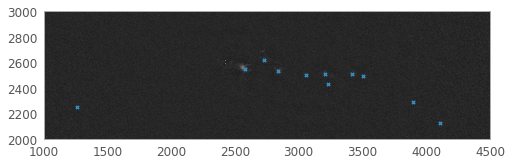

In [148]:
plt.scatter(y_pix, x_pix, marker='x', s=10)
plt.imshow(highres.value, cmap='gray', interpolation="nearest",
          origin="lower")
plt.axis((1000,4500,2000,3000))
# plt.colorbar()
plt.grid(False)
highres_values=[]
for i in range(len(y_pix)):
    h=highres.value[int(y_pix[i]), int(x_pix[i])]
    highres_values.append(h)
print(highres_values)

In [149]:
semifull_conv.shape
y_pix_sf[0]

array(64.72260123)

In [150]:
blured_values=[]
for i in range(len(y_pix_sf)):
    b=semifull_conv[int(x_pix_sf[i]), int(y_pix_sf[i])]
    blured_values.append(b)
print(blured_values)

[-91134063.38649681, 21097658094.171944, 9927593923.43224, 5036889035.026337, 8049620196.682798, 821145927.6468751, 7325137116.13541, 1123787879.1236217, 608517373.9949858, 11416345037.449944, 57003423052.02217]


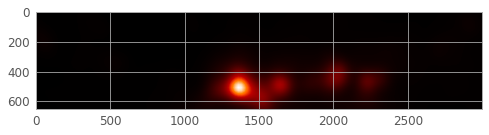

In [151]:
plt.imshow(array_semifull)

In [152]:
low_values=[]
for i in range(len(y_pix_sf)):
    l=array_semifull[int(x_pix_sf[i]), int(y_pix_sf[i])]
    low_values.append(l)
print(low_values)

[4404561587.151132, 67023910485.88505, 37345971993.46789, 23257331870.346287, 47153862329.8064, 18938438634.84528, 57111680514.201996, 4916618322.497497, 4507149755.530454, 38168163934.798935, 148971398424.89148]


In [153]:
print(x_pix_sf, y_pix_sf)

[array(198.00526103), array(480.00026827), array(458.00230661), array(440.00280059), array(456.00127587), array(448.00076237), array(564.00006335), array(76.0075196), array(236.0056128), array(376.00140407), array(493.99998816)] [array(64.72260123), array(1641.70809744), array(2219.64450561), array(2306.77076842), array(2004.73356157), array(1859.52355739), array(1531.34776022), array(2905.04110102), array(2695.93648387), array(2033.77618458), array(1377.42522723)]


In [154]:
array_semifull[198,64]

4404561587.151132

-4333549056.0 1 / sr


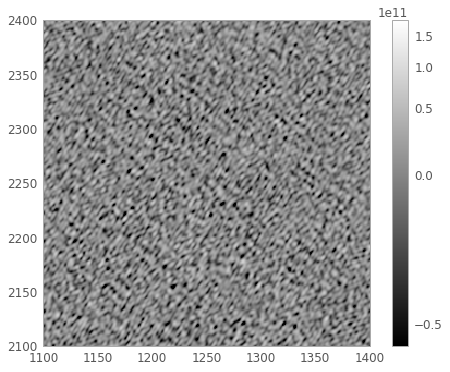

In [155]:
print(highres[int(y_pix[0]), int(x_pix[0])])
#Point 0 = nothing there
# value = -4333549000.0
# plt.scatter(y_pix[0], x_pix[0])
norm_pt0 = simple_norm(highres.value, stretch='asinh', min_percent=3, max_percent=99.99)
plt.imshow(highres.value, cmap='gray', interpolation="nearest",
          origin="lower", norm=norm_pt0)
plt.axis((1100,1400,2100,2400))
plt.grid(False)
plt.colorbar()

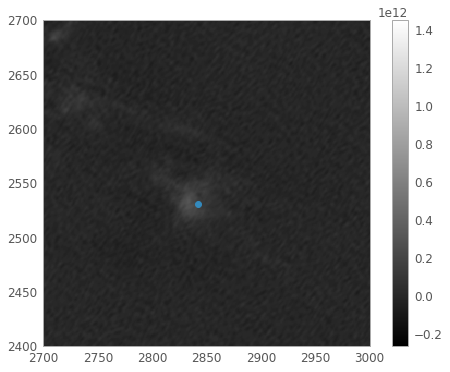

In [156]:
# Point 1 = Centered on a source
# value = 19593850000.0
plt.scatter(y_pix[1], x_pix[1])
plt.imshow(highres.value, cmap='gray', interpolation="nearest",
          origin="lower")
plt.axis((2700,3000,2400,2700))
plt.grid(False)
plt.colorbar()

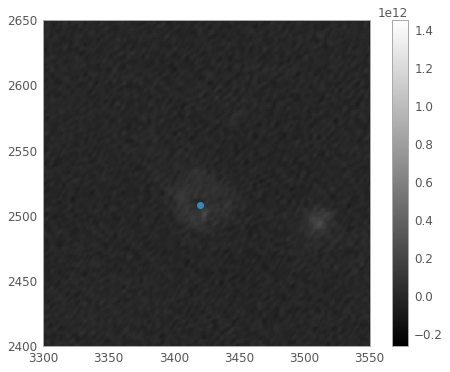

In [157]:
# Point 2 = Centered on a faint something... (there is a bit of a hole in the center?)
# value = 5573121000.0
plt.scatter(y_pix[2], x_pix[2])
plt.imshow(highres.value, cmap='gray', interpolation="nearest",
          origin="lower")
plt.axis((3300,3550,2400,2650))
plt.grid(False)
plt.colorbar()

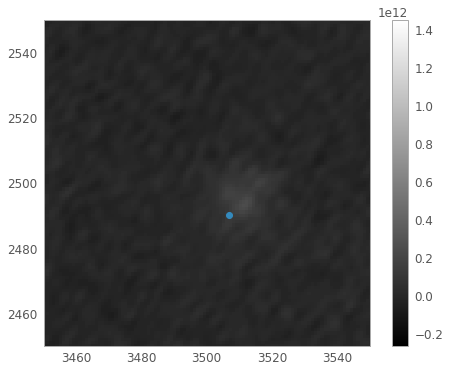

In [158]:
# Point 3 = off center of something
# value = 30914640000.0,
plt.scatter(y_pix[3], x_pix[3])
plt.imshow(highres.value, cmap='gray', interpolation="nearest",
          origin="lower")
plt.axis((3450,3550,2450,2550))
plt.grid(False)
plt.colorbar()

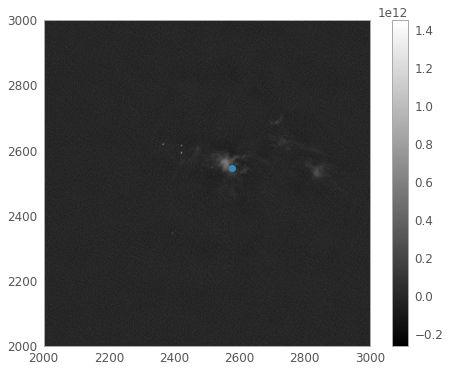

In [159]:
# Point 4 = nothing at point, looks to be bellow a possible faint unmarked source...  
# value = -5221811700.0
plt.scatter(y_pix[10], x_pix[10])
plt.imshow(highres.value, cmap='gray', interpolation="nearest",
          origin="lower")
plt.axis((2000,3000,2000,3000))
plt.grid(False)
plt.colorbar()

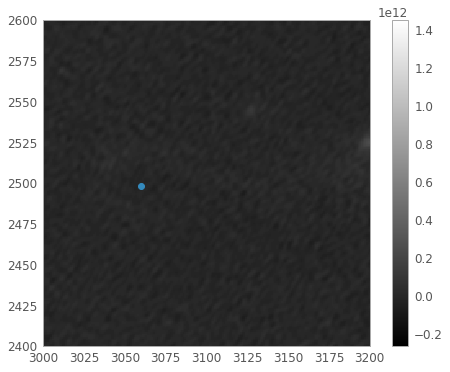

In [160]:
# Point 5 = nothing there
# value = -33848295000.0
plt.scatter(y_pix[5], x_pix[5])
plt.imshow(highres.value, cmap='gray', interpolation="nearest",
          origin="lower")
plt.axis((3000,3200,2400,2600))
plt.grid(False)
plt.colorbar()

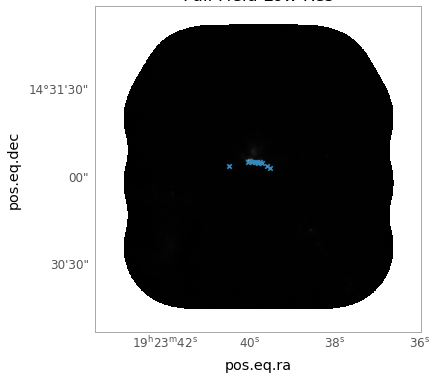

In [161]:
norm_full_low=simple_norm(lowres.value, stretch='asinh', min_percent=0.01, max_percent=99.99)
ax = plt.subplot(projection=wcs_low.celestial)
plt.imshow(lowres.value, cmap='gray', interpolation="nearest", origin="lower")
ax.grid(False)
ax.set_title('Full Field Low Res')
plt.scatter(ra, dec, transform=ax.get_transform('icrs'), marker='x', s=20)
plt.show()

In [162]:
y_pix_l=[]
x_pix_l=[]
for i in range(len(ra)):
    pix_l=wcs_low.celestial.wcs_world2pix(ra[i], dec[i], 0)
    y_pix_l.append(pix_l[0])
    x_pix_l.append(pix_l[1])
# print(y_pix, x_pix)
lowres_values=[]
for i in range(len(y_pix)):
    l=lowres.value[int(y_pix_l[i]), int(x_pix_l[i])]
    lowres_values.append(l)
print(lowres_values)

[200085660.0, 603150800.0, 2091956500.0, 3105516000.0, 1266442900.0, 979676350.0, 472488740.0, 4164239000.0, 8504652300.0, 1070175700.0, 345649150.0]


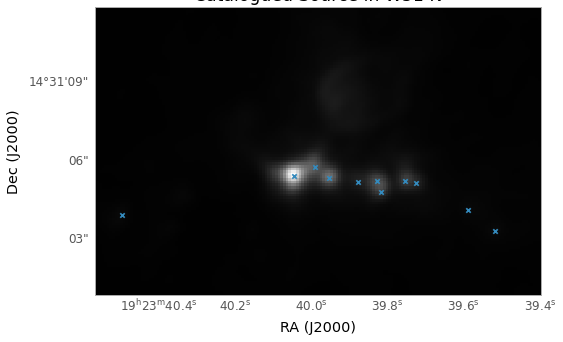

In [163]:
ax = plt.subplot(projection=wcs_low.celestial)
plt.imshow(lowres.value, cmap='gray', interpolation="nearest", origin="lower")

plt.scatter(y_pix_l, x_pix_l, marker='x', s=20)
plt.axis((450,620,540,650))
plt.grid(False)
ax.set_title('Catalogued Source in W51 N')
ax.set_ylabel('Dec (J2000)')
ax.set_xlabel('RA (J2000)')
#plt.colorbar()
plt.show()

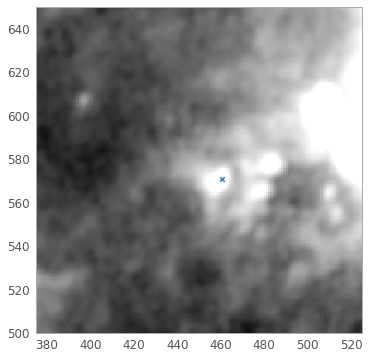

In [164]:
# plt.scatter(y_pix[0], x_pix[0])
# plt.imshow(highres.value, cmap='gray', interpolation="nearest",
#           origin="lower")
# plt.axis((3000,3200,2400,2600))
# plt.grid(False)
# plt.colorbar()
# Point 0
ax = plt.subplot()
norm_pt0 = simple_norm(lowres, stretch='asinh', min_percent=3, max_percent=99)
plt.scatter(y_pix_l[0], x_pix_l[0], marker='x', s=20)
ax.imshow(lowres, cmap='gray', interpolation="nearest", origin="lower", norm=norm_pt0)
plt.axis((375,525,500,650))
plt.grid(False)
# plt.colorbar()

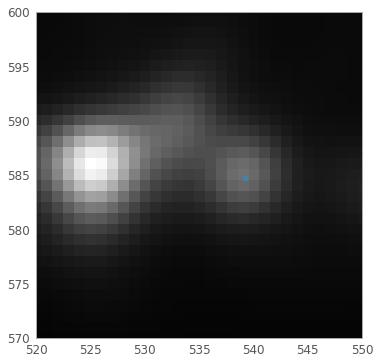

In [165]:
#point 1
# ax = plt.subplot(projection=wcs_low.celestial)
plt.imshow(lowres.value, cmap='gray', interpolation="nearest", origin="lower")
plt.scatter(y_pix_l[1], x_pix_l[1], marker='x', s=20)
plt.axis((520,550,570,600))
plt.grid(False)
# plt.colorbar()
plt.show()

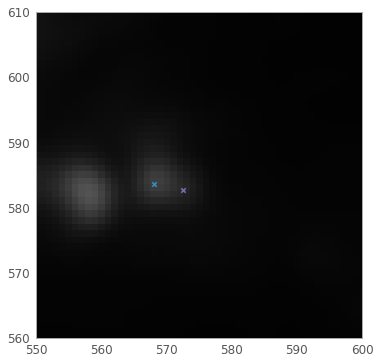

In [166]:
# Point 2
# Point 3 = not really anything there (purple)
# ax = plt.subplot(projection=wcs_low.celestial)
plt.imshow(lowres.value, cmap='gray', interpolation="nearest", origin="lower")
plt.scatter(y_pix_l[2], x_pix_l[2], marker='x', s=20)
plt.scatter(y_pix_l[3], x_pix_l[3], marker='x', s=20)
plt.axis((550,600,560,610))
plt.grid(False)
# plt.colorbar()
plt.show()

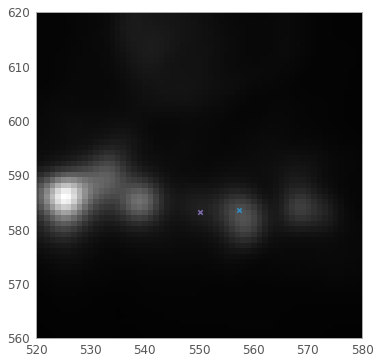

In [167]:
# Point 4
# Point 5
# ax = plt.subplot(projection=wcs_low.celestial)
plt.imshow(lowres.value, cmap='gray', interpolation="nearest", origin="lower")
plt.scatter(y_pix_l[4], x_pix_l[4], marker='x', s=20)
plt.scatter(y_pix_l[5], x_pix_l[5], marker='x', s=20)
plt.axis((520,580,560,620))
plt.grid(False)
# plt.colorbar()
plt.show()

In [168]:
# from astropy.visualization import quantity_support
# quantity_support()
# plt.hist(zoom_high.ravel(), log=True, bins=50)

In [169]:
print(min(highres[2]), min(lowres[2]))

-209448796160.0 1 / sr nan 1 / sr


In [170]:
# print(lowres)

In [171]:
# print(highres)

In [172]:
x_array2=np.array(blured_values)
print(blured_values)

[-91134063.38649681, 21097658094.171944, 9927593923.43224, 5036889035.026337, 8049620196.682798, 821145927.6468751, 7325137116.13541, 1123787879.1236217, 608517373.9949858, 11416345037.449944, 57003423052.02217]


In [173]:
x_array1=np.array(low_values)
print(low_values)

[4404561587.151132, 67023910485.88505, 37345971993.46789, 23257331870.346287, 47153862329.8064, 18938438634.84528, 57111680514.201996, 4916618322.497497, 4507149755.530454, 38168163934.798935, 148971398424.89148]


In [174]:
y_array = np.array(blured_values)/np.array(low_values)
print(y_array)

[-0.02069084  0.31477808  0.2658277   0.21657209  0.17070967  0.04335869
  0.12825988  0.22856927  0.13501157  0.29910648  0.38264676]


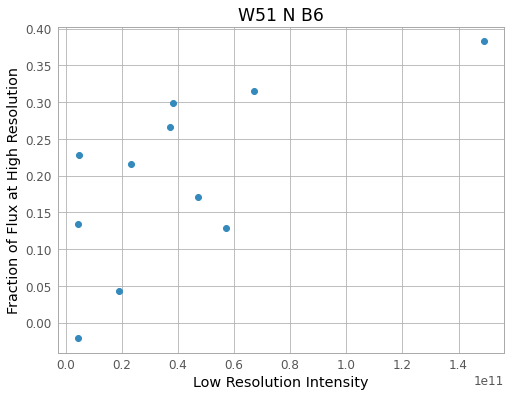

In [175]:
ax = plt.subplot()
plt.scatter(x_array1, y_array)
ax.set_ylabel('Fraction of Flux at High Resolution')
ax.set_xlabel('Low Resolution Intensity')
ax.set_title('W51 N B6')
plt.show()

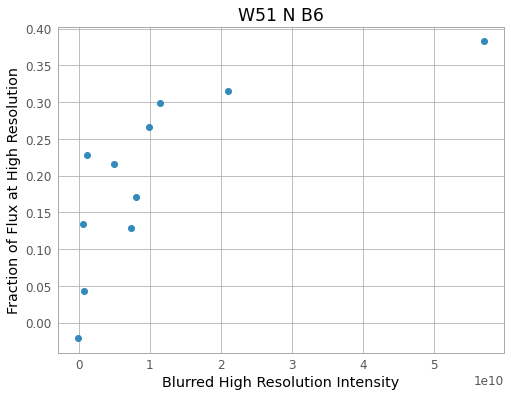

In [176]:
ax = plt.subplot()
plt.scatter(x_array2, y_array)
ax.set_ylabel('Fraction of Flux at High Resolution')
ax.set_xlabel('Blurred High Resolution Intensity')
ax.set_title('W51 N B6')
plt.show()

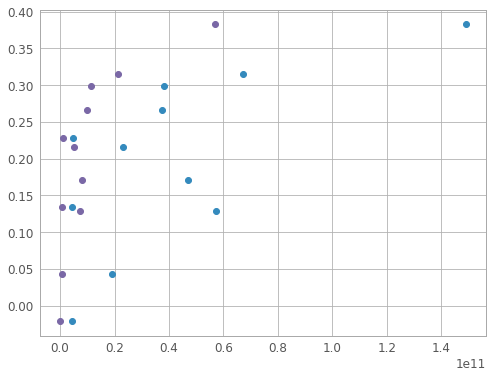

In [177]:
plt.scatter(x_array1, y_array)
plt.scatter(x_array2, y_array)
plt.show()

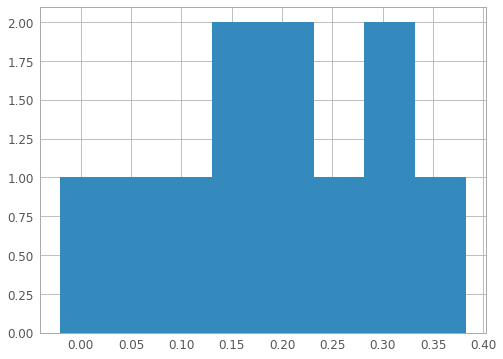

In [178]:
NBINS = 8
histogram = plt.hist(y_array, NBINS)
# histogram = plt.hist((zoom_high.value).flat, NBINS)

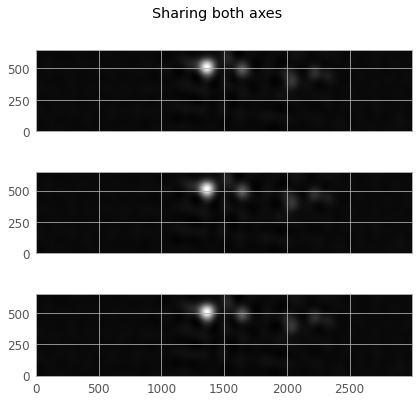

In [179]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].imshow(semifull_conv, cmap='gray', interpolation="nearest", origin="lower")
axs[1].imshow(semifull_conv, cmap='gray', interpolation="nearest", origin="lower")
axs[2].imshow(semifull_conv, cmap='gray', interpolation="nearest", origin="lower")
plt.show()

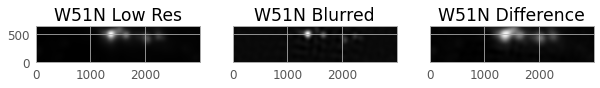

In [180]:
diff = array_semifull-semifull_conv
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(10, 12))
ax[0].imshow(array_semifull, cmap='gray', interpolation="nearest", origin="lower")
ax[1].imshow(semifull_conv, cmap='gray', interpolation="nearest", origin="lower")
ax[2].imshow(diff, cmap='gray', interpolation="nearest", origin="lower")
# ax[0].set_ylabel('Fraction of Flux at High Resolution')
# ax[0].set_xlabel('Blurred High Resolution Intensity')
ax[0].set_title('W51N Low Res')
ax[1].set_title('W51N Blurred')
ax[2].set_title('W51N Difference')
plt.show()

# ax = plt.subplot(projection=wcs_low.celestial)

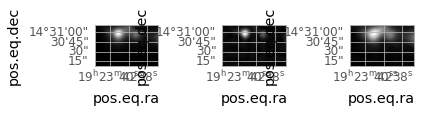

In [181]:
#ax = plt.subplot(projection=wcs_low.celestial)
grid = plt.GridSpec(1, 4, wspace=1, hspace=0.5)
plt.subplot(grid[0, 1], projection=wcs_low.celestial)
plt.imshow(array_semifull[0:900, 1000:2000], cmap='gray', interpolation="nearest", origin="lower")
plt.subplot(grid[0, 2], projection=wcs_low.celestial)
plt.imshow(semifull_conv[0:900, 1000:2000], cmap='gray', interpolation="nearest", origin="lower")
plt.subplot(grid[0, 3], projection=wcs_low.celestial)
plt.imshow(diff[0:900, 1000:2000], cmap='gray', interpolation="nearest", origin="lower");
# plt.set_title('W51N Difference')

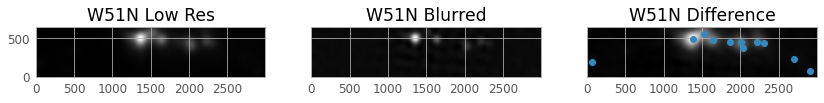

In [182]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(14, 15))
# plt.subplot(projection=wcs_low.celestial)
axes[0].imshow(array_semifull, cmap='gray', interpolation="nearest", origin="lower")
axes[1].imshow(semifull_conv, cmap='gray', interpolation="nearest", origin="lower")
axes[2].imshow(diff, cmap='gray', interpolation="nearest", origin="lower")
axes[0].set_title('W51N Low Res')
axes[1].set_title('W51N Blurred')
axes[2].set_title('W51N Difference')
plt.scatter(y_pix_sf, x_pix_sf)
plt.show()
# plt.imshow(array_semifull, cmap='gray', interpolation="nearest", origin="lower")

14 114
148 248
1591 1691
430 530


/apps/python/3.7/lib/python3.7/site-packages/ipykernel/__main__.py:18: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


2169 2269
408 508


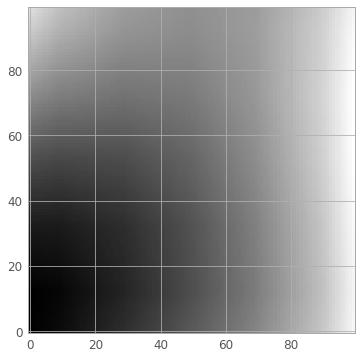

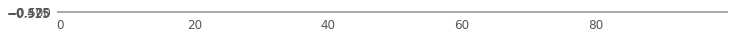

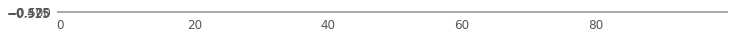

In [183]:
y_pix_sf=[]
x_pix_sf=[]
for i in range(len(ra)):
    pix_sf=wcs_high[2050:2700,1200:4200].celestial.wcs_world2pix(ra[i], dec[i], 0)
    y_pix_sf.append(pix_sf[0])
    x_pix_sf.append(pix_sf[1])

for i in range(3):
    y = y_pix_sf[i]
    x = x_pix_sf[i]
    y_min = int(y) - 50
    y_max = int(y) + 50
    x_min = int(x) - 50
    x_max = int(x) + 50
    print(y_min, y_max)
    print(x_min, x_max)
    fig = plt.figure(figsize=(12,6))
    plt.imshow(array_semifull[y_min:y_max, x_min:x_max], cmap='gray', interpolation="nearest", origin="lower")
    fig.savefig('fig.png', bbox_inches='tight')
plt.show()